<a href="https://colab.research.google.com/github/teenwolf395/L4/blob/main/L5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install kaggle
!pip install catboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.2/99.2 MB 7.2 MB/s eta 0:00:00


In [2]:
from google.colab import files
import os
import shutil

# Шаг 1: Загружаем kaggle.json
print("Пожалуйста, загрузите файл kaggle.json:")
uploaded = files.upload()

# Проверяем, что файл загружен
if 'kaggle.json' not in uploaded:
    print("Ошибка: файл kaggle.json не найден среди загруженных файлов")
else:
    print("Файл kaggle.json успешно загружен")

    # Шаг 2: Настраиваем Kaggle API
    source_path = 'kaggle.json'
    destination_dir = os.path.expanduser('~/.kaggle')
    destination_path = os.path.join(destination_dir, 'kaggle.json')

    # Создаем директорию, если не существует
    os.makedirs(destination_dir, exist_ok=True)

    # Перемещаем файл
    shutil.move(source_path, destination_path)

    # Устанавливаем правильные права доступа
    os.chmod(destination_path, 0o600)

    print("Kaggle API настроен успешно")

    # Шаг 3: Скачиваем датасет
    print("Скачиваем датасет")
    !kaggle datasets download -d nancyalaswad90/lung-cancer

    # Шаг 4: Распаковываем
    import zipfile
    with zipfile.ZipFile('lung-cancer.zip', 'r') as zip_ref:
        zip_ref.extractall('.')

    print("Датасет готов к использованию!")

Пожалуйста, загрузите файл kaggle.json:


Saving kaggle.json to kaggle.json
Файл kaggle.json успешно загружен
Kaggle API настроен успешно
Скачиваем датасет
Dataset URL: https://www.kaggle.com/datasets/nancyalaswad90/lung-cancer
License(s): CC-BY-NC-SA-4.0
  0% 0.00/2.00k [00:00<?, ?B/s]
100% 2.00k/2.00k [00:00<00:00, 8.04MB/s]
Датасет готов к использованию!


In [3]:
import pandas as pd

#Я назвала датасет LCStatistics (Lung cancer statistics). можешь переименовать))
#поля в датасете:
#GENDER                   пол
#AGE                      возраст
#SMOKING                  курение
#YELLOW_FINGERS           желтые пальцы
#ANXIETY                  тревожность
#PEER_PRESSURE            давление со стороны сверстников???
#CHRONIC DISEASE          хроническая болезнь
#FATIGUE                  усталость
#ALLERGY                  аллергия
#WHEEZING                 свистящее дыхание
#ALCOHOL CONSUMING        потребление алкоголя
#COUGHING                 кашель
#SHORTNESS OF BREATH      затрудненное дыхание
#SWALLOWING DIFFICULTY    затруднение при глотании
#CHEST PAIN               боль в груди
#LUNG_CANCER              рак легких

LCStatistics = pd.DataFrame()
try:
    if os.path.getsize('survey lung cancer.csv') > 0:
      LCStatistics = pd.read_csv('survey lung cancer.csv')
      type(LCStatistics)
      print('Файл проимпортирован\n')
    else:
      print('Файл пустой')
except OSError as e:
    print('Файла не существует')

Файл проимпортирован



In [4]:
print(LCStatistics.isnull().sum())

GENDER                   0
AGE                      0
SMOKING                  0
YELLOW_FINGERS           0
ANXIETY                  0
PEER_PRESSURE            0
CHRONIC DISEASE          0
FATIGUE                  0
ALLERGY                  0
WHEEZING                 0
ALCOHOL CONSUMING        0
COUGHING                 0
SHORTNESS OF BREATH      0
SWALLOWING DIFFICULTY    0
CHEST PAIN               0
LUNG_CANCER              0
dtype: int64


In [5]:
LCStatistics.describe(include = "all")

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
count,309,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309
unique,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
top,M,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,YES
freq,162,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,270
mean,NaN,62.673139,1.563107,1.569579,1.498382,1.501618,1.504854,1.673139,1.556634,1.556634,1.556634,1.579288,1.640777,1.469256,1.556634,NaN
std,NaN,8.210301,0.496806,0.495938,0.500808,0.500808,0.500787,0.469827,0.497588,0.497588,0.497588,0.494474,0.480551,0.499863,0.497588,NaN
min,NaN,21.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,NaN
25%,NaN,57.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,NaN
50%,NaN,62.000000,2.000000,2.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,2.000000,NaN
75%,NaN,69.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,NaN


Загрузка данных...
Исходные названия колонок:
 1. 'GENDER'
 2. 'AGE'
 3. 'SMOKING'
 4. 'YELLOW_FINGERS'
 5. 'ANXIETY'
 6. 'PEER_PRESSURE'
 7. 'CHRONIC DISEASE'
 8. 'FATIGUE '
 9. 'ALLERGY '
10. 'WHEEZING'
11. 'ALCOHOL CONSUMING'
12. 'COUGHING'
13. 'SHORTNESS OF BREATH'
14. 'SWALLOWING DIFFICULTY'
15. 'CHEST PAIN'
16. 'LUNG_CANCER'

Очищенные названия колонок:
 1. GENDER
 2. AGE
 3. SMOKING
 4. YELLOW_FINGERS
 5. ANXIETY
 6. PEER_PRESSURE
 7. CHRONIC_DISEASE
 8. FATIGUE
 9. ALLERGY
10. WHEEZING
11. ALCOHOL_CONSUMING
12. COUGHING
13. SHORTNESS_OF_BREATH
14. SWALLOWING_DIFFICULTY
15. CHEST_PAIN
16. LUNG_CANCER

ПРЕОБРАЗОВАНИЕ КОДИРОВКИ КОЛОНОК
1. Преобразование бинарных колонок (2=YES -> 1, 1=NO -> 0):
  SMOKING
  YELLOW_FINGERS
  ANXIETY
  PEER_PRESSURE
  CHRONIC_DISEASE
  FATIGUE
  ALLERGY
  WHEEZING
  ALCOHOL_CONSUMING
  COUGHING
  SHORTNESS_OF_BREATH
  SWALLOWING_DIFFICULTY
  CHEST_PAIN

--- Преобразование SMOKING ---
Уникальные значения до преобразования: [np.int64(1), np.int64(2)]
Н

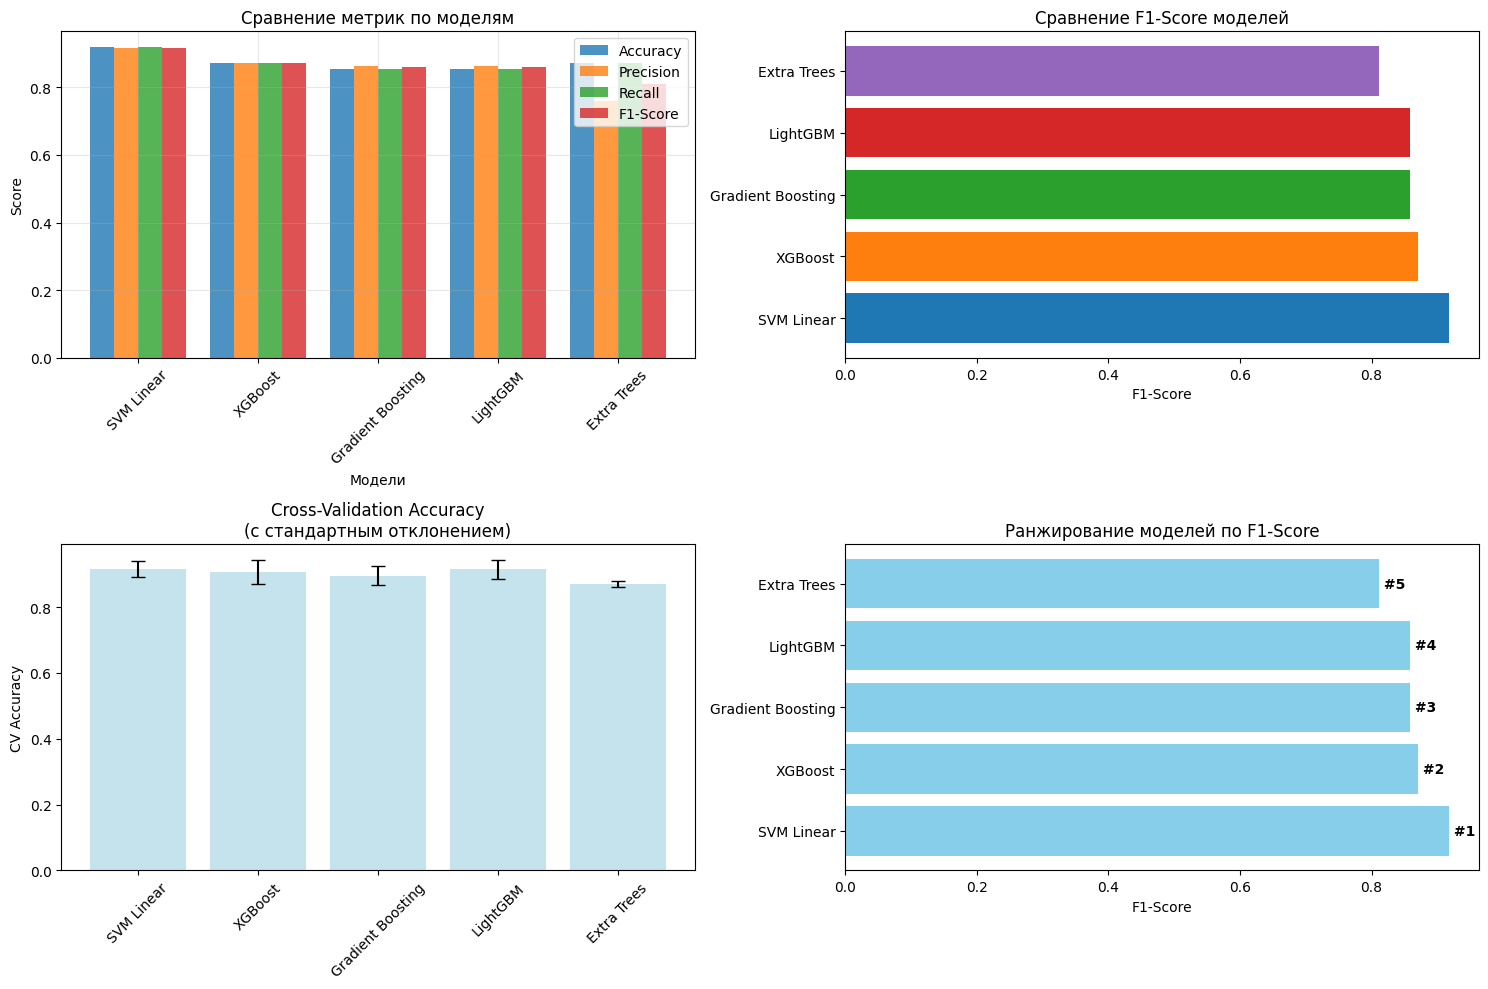


🏆 ЛУЧШАЯ МОДЕЛЬ: SVM Linear
Accuracy:  0.9194
F1-Score:  0.9170
Precision: 0.9156
Recall:    0.9194

Детальный анализ лучшей модели: SVM Linear


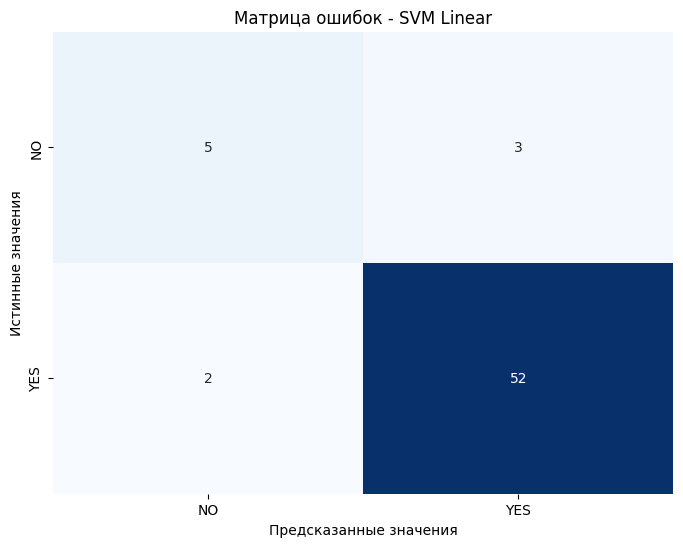

Отчет классификации:
              precision    recall  f1-score   support

          NO       0.71      0.62      0.67         8
         YES       0.95      0.96      0.95        54

    accuracy                           0.92        62
   macro avg       0.83      0.79      0.81        62
weighted avg       0.92      0.92      0.92        62


Результаты сохранены в 'top5_models_comparison.csv'

🎯 ФИНАЛЬНЫЕ РЕКОМЕНДАЦИИ:
1. Лучшая модель: SVM Linear
2. Ожидаемая точность: 0.9194
3. F1-Score: 0.9170
4. Все бинарные признаки преобразованы к формату 0=NO, 1=YES

📊 ИНТЕРПРЕТАЦИЯ РЕЗУЛЬТАТОВ:
Целевая переменная: {0: 'NO', 1: 'YES'}
Пол: {0: 'F', 1: 'M'}
Бинарные признаки (включая SMOKING): 0 = NO, 1 = YES


In [12]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Выбранные классификаторы - 5 наиболее подходящих для наших данных
from sklearn.ensemble import GradientBoostingClassifier, ExtraTreesClassifier
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.svm import SVC

# =============================================================================
# ЗАГРУЗКА И ПРЕДОБРАБОТКА НАЗВАНИЙ КОЛОНОК
# =============================================================================

def clean_column_names(df):
    """
    Функция для очистки названий колонок:
    - Убирает пробелы в начале и конце
    - Заменяет пробелы между словами на нижние подчеркивания
    - Приводит к верхнему регистру
    """
    cleaned_columns = []
    for col in df.columns:
        # Убираем пробелы в начале и конце
        col_clean = col.strip()
        # Заменяем пробелы между словами на нижние подчеркивания
        col_clean = col_clean.replace(' ', '_')
        # Приводим к верхнему регистру для единообразия
        col_clean = col_clean.upper()
        cleaned_columns.append(col_clean)

    return cleaned_columns

# Загрузка данных с исправлением названий колонок
print("Загрузка данных...")
LCStatistics = pd.read_csv('survey lung cancer.csv')

print("Исходные названия колонок:")
for i, col in enumerate(LCStatistics.columns, 1):
    print(f"{i:2d}. '{col}'")

# Очищаем названия колонок
cleaned_columns = clean_column_names(LCStatistics)
LCStatistics.columns = cleaned_columns

print("\nОчищенные названия колонок:")
for i, col in enumerate(LCStatistics.columns, 1):
    print(f"{i:2d}. {col}")

# =============================================================================
# ПРЕОБРАЗОВАНИЕ КОДИРОВКИ КОЛОНОК
# =============================================================================

print("\n" + "=" * 80)
print("ПРЕОБРАЗОВАНИЕ КОДИРОВКИ КОЛОНОК")
print("=" * 80)

# Колонки, которые нужно преобразовать: 2=YES -> 1, 1=NO -> 0
columns_to_transform = [
    'SMOKING', 'YELLOW_FINGERS', 'ANXIETY', 'PEER_PRESSURE', 'CHRONIC_DISEASE',
    'FATIGUE', 'ALLERGY', 'WHEEZING', 'ALCOHOL_CONSUMING',
    'COUGHING', 'SHORTNESS_OF_BREATH', 'SWALLOWING_DIFFICULTY', 'CHEST_PAIN'
]

# Целевая переменная (текстовые значения YES/NO)
target_column = 'LUNG_CANCER'

# Инициализируем переменные для mapping'ов
class_mapping = {}
gender_mapping = {}

print("1. Преобразование бинарных колонок (2=YES -> 1, 1=NO -> 0):")
cols_found = []
for col in columns_to_transform:
    if col in LCStatistics.columns:
        cols_found.append(col)
        print(f"  {col}")
    else:
        print(f"  ⚠️ Колонка {col} не найдена в датасете")

# Преобразуем каждую бинарную колонку
for col in cols_found:
    print(f"\n--- Преобразование {col} ---")
    print(f"Уникальные значения до преобразования: {sorted(LCStatistics[col].unique())}")

    # Проверяем, какие значения действительно есть в данных
    unique_values = LCStatistics[col].unique()
    print(f"Найдены значения: {unique_values}")

    # Создаем mapping только для существующих значений
    value_mapping = {}
    if 1 in unique_values:
        value_mapping[1] = 0  # NO
    if 2 in unique_values:
        value_mapping[2] = 1  # YES

    print(f"Применяемое преобразование: {value_mapping}")

    # Применяем преобразование
    LCStatistics[col] = LCStatistics[col].map(value_mapping)

    print(f"Уникальные значения после преобразования: {sorted(LCStatistics[col].unique())}")
    print(f"Распределение после: {LCStatistics[col].value_counts().to_dict()}")

print("\n2. Преобразование целевой переменной LUNG_CANCER (текст -> числа):")
if target_column in LCStatistics.columns:
    print(f"Уникальные значения до преобразования: {LCStatistics[target_column].unique()}")

    # Кодируем текстовые значения YES/NO в числа
    label_encoder = LabelEncoder()
    LCStatistics[target_column] = label_encoder.fit_transform(LCStatistics[target_column])

    # Создаем mapping для обратного преобразования
    class_mapping = {i: label for i, label in enumerate(label_encoder.classes_)}
    print(f"Преобразование: {class_mapping}")

    print(f"Уникальные значения после преобразования: {sorted(LCStatistics[target_column].unique())}")
    print(f"Распределение после: {LCStatistics[target_column].value_counts().to_dict()}")
else:
    print(f"⚠️ Колонка {target_column} не найдена в датасете")

print("\n3. Преобразование колонки GENDER (текст -> числа):")
if 'GENDER' in LCStatistics.columns:
    print(f"Уникальные значения до преобразования: {LCStatistics['GENDER'].unique()}")

    # Кодируем текстовые значения M/F в числа
    gender_encoder = LabelEncoder()
    LCStatistics['GENDER'] = gender_encoder.fit_transform(LCStatistics['GENDER'])

    # Создаем mapping для обратного преобразования
    gender_mapping = {i: label for i, label in enumerate(gender_encoder.classes_)}
    print(f"Преобразование: {gender_mapping}")

    print(f"Уникальные значения после преобразования: {sorted(LCStatistics['GENDER'].unique())}")
    print(f"Распределение после: {LCStatistics['GENDER'].value_counts().to_dict()}")
else:
    print(f"⚠️ Колонка GENDER не найдена в датасете")

# =============================================================================
# ПРЕДОБРАБОТКА ДАННЫХ И ОБУЧЕНИЕ МОДЕЛЕЙ
# =============================================================================

print("\n" + "=" * 80)
print("ПРЕДОБРАБОТКА ДАННЫХ И ОБУЧЕНИЕ МОДЕЛЕЙ")
print("=" * 80)

# Разделение на признаки и целевую переменную
X = LCStatistics.drop('LUNG_CANCER', axis=1)
y = LCStatistics['LUNG_CANCER']

print(f"Размерность признаков: {X.shape}")
print(f"Размерность целевой переменной: {y.shape}")

# Разделение на тренировочную и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print(f"\nРазделение данных:")
print(f"Тренировочная выборка: {X_train.shape[0]} samples")
print(f"Тестовая выборка: {X_test.shape[0]} samples")

# Масштабирование признаков (для SVM)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Создание словаря классификаторов (5 лучших)
classifiers = {
    'Gradient Boosting': GradientBoostingClassifier(
        n_estimators=100,
        random_state=42,
        max_depth=3,
        learning_rate=0.1
    ),
    'XGBoost': XGBClassifier(
        n_estimators=100,
        random_state=42,
        max_depth=3,
        learning_rate=0.1,
        eval_metric='logloss'
    ),
    'LightGBM': LGBMClassifier(
        n_estimators=100,
        random_state=42,
        max_depth=3,
        learning_rate=0.1,
        verbose=-1
    ),
    'Extra Trees': ExtraTreesClassifier(
        n_estimators=100,
        random_state=42,
        max_depth=3
    ),
    'SVM Linear': SVC(
        kernel='linear',
        random_state=42,
        probability=True,
        C=1.0
    )
}

# Функция для вычисления метрик
def evaluate_model(model, X_train, X_test, y_train, y_test, model_name):
    """Оценка модели с различными метриками"""

    print(f"Обучение {model_name}...")

    # Обучение модели
    model.fit(X_train, y_train)

    # Предсказания
    y_pred = model.predict(X_test)
    y_pred_proba = model.predict_proba(X_test)[:, 1] if hasattr(model, 'predict_proba') else None

    # Основные метрики
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted', zero_division=0)
    recall = recall_score(y_test, y_pred, average='weighted', zero_division=0)
    f1 = f1_score(y_test, y_pred, average='weighted', zero_division=0)

    # Кросс-валидация
    try:
        cv_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy')
        cv_mean = cv_scores.mean()
        cv_std = cv_scores.std()
    except:
        cv_mean = None
        cv_std = None

    return {
        'model': model,
        'accuracy': accuracy,
        'precision': precision,
        'recall': recall,
        'f1': f1,
        'cv_mean': cv_mean,
        'cv_std': cv_std,
        'predictions': y_pred,
        'probabilities': y_pred_proba
    }

# Обучение и оценка всех моделей
results = {}

print("\nОбучение и оценка 5 выбранных моделей...")
print("=" * 80)

for name, classifier in classifiers.items():
    # Для SVM используем масштабированные данные
    if name == 'SVM Linear':
        result = evaluate_model(classifier, X_train_scaled, X_test_scaled, y_train, y_test, name)
    else:
        result = evaluate_model(classifier, X_train, X_test, y_train, y_test, name)

    results[name] = result

    print(f"  {name}:")
    print(f"    Accuracy:  {result['accuracy']:.4f}")
    print(f"    F1-score:  {result['f1']:.4f}")
    print(f"    Precision: {result['precision']:.4f}")
    print(f"    Recall:    {result['recall']:.4f}")
    if result['cv_mean'] is not None:
        print(f"    CV Accuracy: {result['cv_mean']:.4f} (+/- {result['cv_std']:.4f})")
    print("-" * 50)

# Создание DataFrame с результатами
results_df = pd.DataFrame({
    'Model': list(results.keys()),
    'Accuracy': [results[name]['accuracy'] for name in results.keys()],
    'Precision': [results[name]['precision'] for name in results.keys()],
    'Recall': [results[name]['recall'] for name in results.keys()],
    'F1-Score': [results[name]['f1'] for name in results.keys()],
    'CV_Accuracy': [results[name]['cv_mean'] if results[name]['cv_mean'] is not None else 0 for name in results.keys()],
    'CV_Std': [results[name]['cv_std'] if results[name]['cv_std'] is not None else 0 for name in results.keys()]
})

# Сортировка по F1-score (основная метрика для несбалансированных данных)
results_df = results_df.sort_values('F1-Score', ascending=False)

print("\nСравнение моделей (отсортировано по F1-Score):")
print("=" * 80)
print(results_df.to_string(index=False))

# Визуализация результатов
plt.figure(figsize=(15, 10))

# График 1: Сравнение основных метрик
plt.subplot(2, 2, 1)
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score']
x = np.arange(len(results_df))
width = 0.2

for i, metric in enumerate(metrics):
    values = results_df[metric]
    plt.bar(x + i*width, values, width, label=metric, alpha=0.8)

plt.xlabel('Модели')
plt.ylabel('Score')
plt.title('Сравнение метрик по моделям')
plt.xticks(x + width*1.5, results_df['Model'].tolist(), rotation=45)
plt.legend()
plt.grid(True, alpha=0.3)

# График 2: Сравнение F1-score (ИСПРАВЛЕННЫЙ)
plt.subplot(2, 2, 2)
# Исправляем deprecated warning - используем color вместо palette с hue
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd']
for i, (model, score) in enumerate(zip(results_df['Model'], results_df['F1-Score'])):
    plt.barh(model, score, color=colors[i % len(colors)])
plt.title('Сравнение F1-Score моделей')
plt.xlabel('F1-Score')

# График 3: Сравнение кросс-валидации
plt.subplot(2, 2, 3)
cv_data = results_df[results_df['CV_Accuracy'] > 0]
if not cv_data.empty:
    plt.bar(range(len(cv_data)), cv_data['CV_Accuracy'],
            yerr=cv_data['CV_Std'], capsize=5, alpha=0.7, color='lightblue')
    plt.xticks(range(len(cv_data)), cv_data['Model'].tolist(), rotation=45)
    plt.title('Cross-Validation Accuracy\n(с стандартным отклонением)')
    plt.ylabel('CV Accuracy')

# График 4: Ранжирование моделей
plt.subplot(2, 2, 4)
ranking = results_df[['Model', 'F1-Score']].copy()
ranking['Rank'] = range(1, len(ranking) + 1)
plt.barh(ranking['Model'], ranking['F1-Score'], color='skyblue')
plt.xlabel('F1-Score')
plt.title('Ранжирование моделей по F1-Score')
for i, (model, score) in enumerate(zip(ranking['Model'], ranking['F1-Score'])):
    plt.text(score, i, f' #{i+1}', va='center', fontweight='bold')

plt.tight_layout()
plt.show()

# Выбор лучшей модели
best_model_name = results_df.iloc[0]['Model']
best_model_result = results[best_model_name]

print(f"\n🏆 ЛУЧШАЯ МОДЕЛЬ: {best_model_name}")
print("=" * 50)
print(f"Accuracy:  {best_model_result['accuracy']:.4f}")
print(f"F1-Score:  {best_model_result['f1']:.4f}")
print(f"Precision: {best_model_result['precision']:.4f}")
print(f"Recall:    {best_model_result['recall']:.4f}")

# Детальный анализ лучшей модели
print(f"\nДетальный анализ лучшей модели: {best_model_name}")
print("=" * 50)

# Матрица ошибок
cm = confusion_matrix(y_test, best_model_result['predictions'])
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)

# Создаем правильные подписи для матрицы ошибок
if class_mapping:  # Проверяем, что class_mapping не пустой
    labels = [f'{class_mapping[k]}' for k in sorted(class_mapping.keys())]
    plt.xticks(ticks=np.arange(len(labels)) + 0.5, labels=labels)
    plt.yticks(ticks=np.arange(len(labels)) + 0.5, labels=labels)

plt.title(f'Матрица ошибок - {best_model_name}')
plt.ylabel('Истинные значения')
plt.xlabel('Предсказанные значения')
plt.show()

# Отчет классификации
print("Отчет классификации:")
if class_mapping:  # Проверяем, что class_mapping не пустой
    target_names = [f'{class_mapping[k]}' for k in sorted(class_mapping.keys())]
    print(classification_report(y_test, best_model_result['predictions'], target_names=target_names))
else:
    print(classification_report(y_test, best_model_result['predictions']))

# Анализ важности признаков (если доступно)
if hasattr(best_model_result['model'], 'feature_importances_'):
    feature_importances = pd.DataFrame({
        'feature': X.columns,
        'importance': best_model_result['model'].feature_importances_
    }).sort_values('importance', ascending=False)

    plt.figure(figsize=(10, 6))
    # Исправляем deprecated warning - используем обычный barplot
    colors = plt.cm.viridis(np.linspace(0, 1, len(feature_importances)))
    plt.barh(feature_importances['feature'], feature_importances['importance'], color=colors)
    plt.title(f'Важность признаков - {best_model_name}')
    plt.xlabel('Важность')
    plt.tight_layout()
    plt.show()

    print("Топ-5 самых важных признаков:")
    print(feature_importances.head())

# Сохранение результатов
results_df.to_csv('top5_models_comparison.csv', index=False)
print(f"\nРезультаты сохранены в 'top5_models_comparison.csv'")

# Финальные рекомендации
print(f"\n🎯 ФИНАЛЬНЫЕ РЕКОМЕНДАЦИИ:")
print("=" * 50)
print(f"1. Лучшая модель: {best_model_name}")
print(f"2. Ожидаемая точность: {best_model_result['accuracy']:.4f}")
print(f"3. F1-Score: {best_model_result['f1']:.4f}")
print(f"4. Все бинарные признаки преобразованы к формату 0=NO, 1=YES")

print(f"\n📊 ИНТЕРПРЕТАЦИЯ РЕЗУЛЬТАТОВ:")
print("=" * 50)
if class_mapping:
    print(f"Целевая переменная: {class_mapping}")
if gender_mapping:
    print(f"Пол: {gender_mapping}")
print(f"Бинарные признаки (включая SMOKING): 0 = NO, 1 = YES")